## CNN Neural Network (Manual) For Cancerous and Non-Cancerous Cell Classification

In [1]:
# minimal imports necessary for our manual implementation of CNN
import numpy as np
import pandas as pd
import cv2

## Preprocessing Data

In [ ]:
# Sources:
# Source - https://stackoverflow.com/a
# Posted by Usama Aleem
# Retrieved 2025-11-26, License - CC BY-SA 4.0
# Used for saving images

# https://medium.com/@maahip1304/the-complete-guide-to-image-preprocessing-techniques-in-python-dca30804550c
# used to understand best image preprocessing practices
import os, sys
import matplotlib.pyplot as plt

'''
Converting images in the directory to .npy format for usability in CNN model.
We first load the image with cv2, grayscale it, then resize the image to a 
(256, 256) shape. We then normalize the number in a range of [0,1], and we 
apply a Gaussian blur to smooth the images. We then append this array to the
x_train data to be converted to a npy file.
'''

def preprocess_images(chosen_dir: str):
    path = '../data/cancer_dataset/lung_colon_image_set/'
    path = path+chosen_dir
    dirs = os.listdir( path )
    dirs.sort()
    for item in dirs:
        image = cv2.imread(path+item)
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray_image = cv2.resize(gray_image, (256, 256))
        blur_image = cv2.GaussianBlur(gray_image, (5,5), 0)
        # create the directory where the data will be stored
        dest_dir = os.path.join('reduced_cnn_data', chosen_dir)
        os.makedirs(dest_dir, exist_ok=True)
        out_path = os.path.join(dest_dir, item)
        cv2.imwrite(out_path, blur_image)

# do not run these, files already created
# preprocess_images('colon_image_sets/colon_aca/')
# preprocess_images('colon_image_sets/colon_n/')
# preprocess_images('lung_image_sets/lung_aca/')
# preprocess_images('lung_image_sets/lung_n/')
# preprocess_images('lung_image_sets/lung_scc/')



In [ ]:
# Sources:
# Source - https://stackoverflow.com/a
# Posted by Usama Aleem
# Retrieved 2025-11-26, License - CC BY-SA 4.0
# Used for learning to save images
'''
Convert our compress data to npy images
'''

def convert_to_npy(chosen_dir: str, filename: str):
    path = 'reduced_cnn_data/'
    path = path+chosen_dir
    dirs = os.listdir( path )
    dirs.sort()
    x_train = []
    for item in dirs:
        image = cv2.imread(path+item)
        img_array = np.array(image)
        x_train.append(img_array)

    # create the directory where the data will be stored
    dest_dir = os.path.join('reduced_cnn_data/', 'npy/')
    os.makedirs(dest_dir, exist_ok=True)
    out_path = os.path.join(dest_dir, filename)
    np.save(out_path, img_array)

# convert_to_npy('colon_image_sets/colon_aca/', 'colon_aca.npy')
# convert_to_npy('colon_image_sets/colon_n/', 'colon_n.npy')
# convert_to_npy('lung_image_sets/lung_aca/', 'lung_aca.npy')
# convert_to_npy('lung_image_sets/lung_n/', 'lung_n.npy')
# convert_to_npy('lung_image_sets/lung_scc/', 'lung_scc.npy')

In [ ]:
# load the npy files


In [19]:
image = cv2.imread('reduced_cnn_data/colon_image_sets/colon_aca/colonaca1.jpeg')
print(image.shape)
plt.imshow(image)
plt.axis('off') 
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

In [13]:
colon_aca_data = np.load('reduced_cnn_data/colon_image_sets/colon_aca/npy/colon_aca.npy')
print(colon_aca_data.shape)


(256, 256, 3)


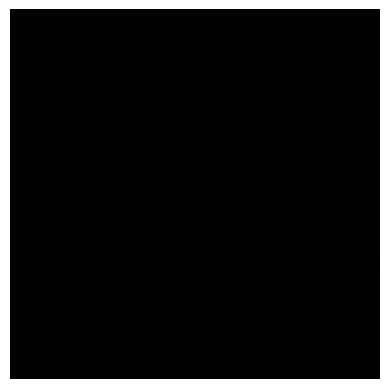

In [17]:
plt.imshow(colon_aca_data)
plt.axis('off') 
plt.show()

In [71]:
print(img_array[0])

[0.91317402 0.89898897 0.86639093 0.83746936 0.82879902 0.84022672
 0.86207108 0.88704044 0.91023284 0.92567402 0.92984069 0.92371324
 0.90713848 0.88235294 0.85928309 0.84080882 0.81954657 0.79552696
 0.77971814 0.78180147 0.7953125  0.80042892 0.78927696 0.77760417
 0.78207721 0.79347426 0.79543505 0.79381127 0.79613971 0.79451593
 0.78262868 0.76473652 0.75174632 0.75015319 0.75710784 0.7734375
 0.80358456 0.83336397 0.83645833 0.81302083 0.78688725 0.76458333
 0.7294424  0.67196691 0.61363358 0.60376838 0.67166054 0.7700674
 0.81240809 0.76976103 0.67742034 0.5810049  0.51188725 0.48125
 0.51461397 0.62864583 0.74788603 0.78740809 0.76580882 0.73651961
 0.71443015 0.69856005 0.68802083 0.67858456 0.66917892 0.6591299
 0.64420956 0.61810662 0.58250613 0.55916054 0.56865809 0.60891544
 0.66663603 0.72671569 0.77922794 0.82349877 0.8510723  0.84791667
 0.81960784 0.78863358 0.77175245 0.76672794 0.75713848 0.73884804
 0.72889093 0.7333027  0.73832721 0.73722426 0.73431373 0.73716299
 

In [19]:
lung_aca_data = np.load('lung_aca.npy')
lung_n_data = np.load('lung_n.npy')
lung_scc_data = np.load('lung_scc.npy')

colon_aca_data = np.load('colon_aca.npy')
colon_n_data = np.load('colon_n.npy')

KeyboardInterrupt: 